In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def prepare_data(data_file, target_column):
    data = pd.read_excel(data_file)
    y = data[target_column]
    X = data.drop(columns=[target_column])

    les = []

    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        les.append(le)

    le = LabelEncoder()
    y = le.fit_transform(y)
    les.append(le)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

    return X_train, X_test, y_train, y_test, les

In [3]:
def train_and_save_model(X_train, y_train, model_filename):
    rf = RandomForestClassifier(random_state=42, n_estimators=512, max_depth=13)
    rf.fit(X_train, y_train)

    with open(model_filename, 'wb') as model_file:
        pickle.dump(rf, model_file)

    return rf

In [4]:
data_file = "/kaggle/input/xtern-ai/XTern 2024 Artificial Intelegence Data Set.xlsx"
target_column = "Order"

X_train, X_test, y_train, y_test, label_encoders = prepare_data(data_file, target_column)

In [5]:
model_file = "rf.pkl"
trained_model = train_and_save_model(X_train, y_train, model_file)

In [6]:
y_pred = trained_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

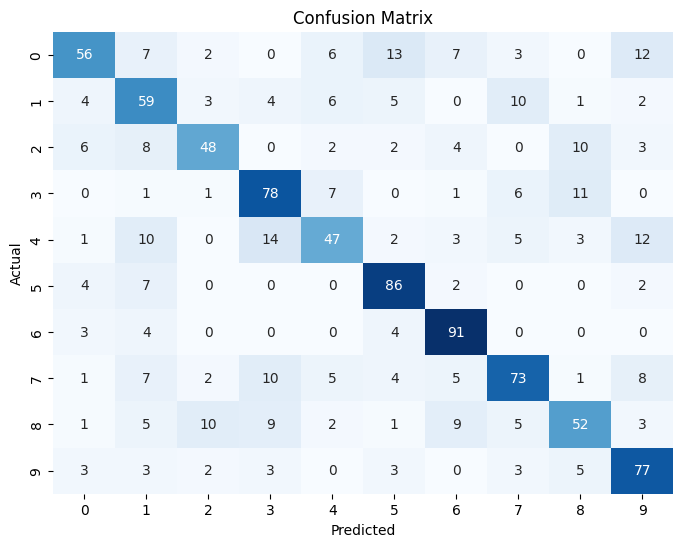

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.67
